<a href="https://colab.research.google.com/github/TsamayaDesigns/codeDivision-data-with-python/blob/main/Data_Project_Beyond_Borders_Analysing_Migration_Patterns_in_South_Africa_(v2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beyond Borders: Analysing Migration Patterns in South Africa
---




* **Author:**
  * Eugene Gerber
* **Date:**
  * 2024-04-24


## Objectives
---
Understanding migration patterns to and from South Africa are crucial for a number of reasons, for example:
1.  Policy Making
2.  Economic Development
3.  Labour Market Planning
4.  Regional Comparison

In this project I will investigate migration patterns and their implications by analising three dataframes containing information on countries, industries, and skills to provide relevant insight and answers to four important questions:
1.  What are the main countries of destination for migrants from South Africa, and how has the net migration rate changed over the years?
2.  Which industries are attracting migrants from South Africa, and what is the trend in their skill demand over recent years?
3.  What are the primary skill categories that migrants take from (or bring to) South Africa, and how have their net migration rates evolved annually?
4.  How does South Africa's migration patterns compare with those of neighbouring countries within the same World Bank region?

Each question will explore a key aspect of migration dynamics, including destination countries, industries attracting migrants, skill categories, and regional comparisons, thereby providing valuable insights into the migration patterns of South Africa.

---


## The Dataset

The Talent Migration Dataset is a collaboration between the World Bank and LinkedIn, providing data on industry employment, skills, and migration metrics for more than 100 countries. The dataset is valuable for analysing global migartion trends and their impact on industries and skills.

**Location:**
* URL_1: [Talent Migration Dataset](https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true)

**Contents:**
* Worksheets:
  1. Country Migration: Data on migration statistics across different countries.
  2. Industry Migration Data on migration statistics across various industries.
  3. Skill Migration Data on migration statistics across different skill sets.

Additionally, a separate dataset containing happiness data, taken from the Gallup World Poll (by the Sustainable Development Solutions Network), and used to rank countries in order of happiness factor, is included in the fuction.
* URL_2: [Happiness Dataset](https://github.com/futureCodersSE/working-with-data/blob/main/Happiness-Data/2015.xlsx?raw=true)


**Code:**

The function **"get_data()"** is created to:

  1. **Specify the Location:**
    * Specify (URLs) of the Talent Migration Dataset and the Happiness Dataset
  2. **Load the DataFrames:**
    * Reads each worksheet from the Talent Migration Dataset, and loads them into separate pandas DataFrames:
      * country_df - for the Country Migration worksheet
      * industry_df - for the Industry Migration worksheet
      * skill_df - for the Skill Migration worksheet
    * Reads the happiness data from the Happiness Dataset, and loads it into a separate pandas DataFrame:
      * happiness_df
  3. **Load GeoDataFrame:**
    * Loads a GeoDataFrame with world shapes for chloropleth maps from a zip file.
  4. **Display Data:**
    * Displays the column names and the first 5 rows of each DataFrame.
  5. **Return DataFrames:**
    * Return a separate DataFrame for each worksheet, as well as the happiness DataFrame.

**Display:**

Directly below the Code Section, the function displays:
* **DataFrame Name:** The name of the DataFrame.
* **Column Names:** The column names of each DataFrame.
* **First 5 rows of Data:**The first 5 rows of each DataFrame.

---



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

pd.set_option("display.width", 270)

# Import & Load Data into DataFrames
def get_data():
  """
  Load data from Excel files from specified URLs.
  The function downloads data from the specified GitHub URLs and loads four Excel sheets into separate pandas DataFrames.
  1. Country Migration data
  2. Industry Migration data
  3. Skill Migration data
  4. Happiness data

  Additionally, it loads a GeoDataFrame with world shapes for chloropleth maps.

  Returns:
    tuple: A tuple containing the following pandas DataFrames and GeoDataFrame:
      - country_df (pd.DataFrame): Dataframe containing country migration data.
      - industry_df (pd.DataFrame): Dataframe containing industry migration data.
      - skill_df (pd.DataFrame): Dataframe containing skill migration data.
      - happiness_df (pd.DataFrame): Dataframe containing happiness migration data.
      - world (pd.GeoDataFrame): GeoDataframe containing world shapes.

  Raises:
    Exception: If an error is detected while loading data

  Example:
    country_df, industry_df, skill_df, happiness_df, world = get_excel_data()
  """
  try:
    # Data source URLs
    url_1 = "https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true"
    url_2 = "https://github.com/futureCodersSE/working-with-data/blob/main/Happiness-Data/2015.xlsx?raw=true"

    # Load data from the data source URLs
    country_df = pd.read_excel(url_1, sheet_name = "Country Migration")
    industry_df = pd.read_excel(url_1, sheet_name = "Industry Migration")
    skill_df =  pd.read_excel(url_1, sheet_name = "Skill Migration")
    happiness_df = pd.read_excel(url_2)

    # Load a GeoDataFrame for world shapes
    zipfile = "zip:///content/ne_110m_admin_0_countries.zip"
    world = gpd.read_file(zipfile)

    # Display Datasets (first 5 rows)
    print("Country Dataframe: ")
    display(country_df.head())
    print(country_df["base_country_wb_income"].unique())
    print("\nIndustry Dataframe: ")
    display(industry_df.head())
    print("\nSkill Dataframe: ")
    display(skill_df.head())
    print("\nHappiness Dataframe: ")
    display(happiness_df.head())

    return country_df, industry_df, skill_df, happiness_df, world

  except Exception as e:
    # Print exceptions that may occur during data loading
    print(f"An error occurred loading the data:\n {e} ")

country_df, industry_df, skill_df, happiness_df, world = get_data()


Country Dataframe: 


,base_country_code,base_country_name,base_lat,base_long,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_lat,target_long,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,af,Afghanistan,33.939110,67.709953,Low Income,South Asia,0.19,0.16,0.11,-0.05,-0.02
1,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,dz,Algeria,28.033886,1.659626,Upper Middle Income,Middle East & North Africa,0.19,0.25,0.57,0.55,0.78
2,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,ao,Angola,-11.202692,17.873887,Lower Middle Income,Sub-Saharan Africa,-0.01,0.04,0.11,-0.02,-0.06
3,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,ar,Argentina,-38.416097,-63.616672,High Income,Latin America & Caribbean,0.16,0.18,0.04,0.01,0.23
4,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,am,Armenia,40.069099,45.038189,Upper Middle Income,Europe & Central Asia,0.10,0.05,0.03,-0.01,0.02


['High Income' 'Low Income' 'Upper Middle Income' 'Lower Middle Income']

Industry Dataframe: 


,country_code,country_name,wb_income,wb_region,isic_section_index,isic_section_name,industry_id,industry_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,ae,United Arab Emirates,High income,Middle East & North Africa,C,Manufacturing,1,Defense & Space,378.74,127.94,8.20,68.51,49.55
1,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,3,Computer Hardware,100.97,358.14,112.98,149.57,182.22
2,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,4,Computer Software,1079.36,848.15,596.48,409.18,407.41
3,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,5,Computer Networking,401.46,447.39,163.99,236.69,188.07
4,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,6,Internet,1840.33,1368.42,877.71,852.39,519.40



Skill Dataframe: 


,country_code,country_name,wb_income,wb_region,skill_group_id,skill_group_category,skill_group_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,af,Afghanistan,Low income,South Asia,2549,Tech Skills,Information Management,-791.59,-705.88,-550.04,-680.92,-1208.79
1,af,Afghanistan,Low income,South Asia,2608,Business Skills,Operational Efficiency,-1610.25,-933.55,-776.06,-532.22,-790.09
2,af,Afghanistan,Low income,South Asia,3806,Specialized Industry Skills,National Security,-1731.45,-769.68,-756.59,-600.44,-767.64
3,af,Afghanistan,Low income,South Asia,50321,Tech Skills,Software Testing,-957.50,-828.54,-964.73,-406.50,-739.51
4,af,Afghanistan,Low income,South Asia,1606,Specialized Industry Skills,Navy,-1510.71,-841.17,-842.32,-581.71,-718.64



Happiness Dataframe: 


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Validation Checks
The function **validate_dataframes()** is designed to validate data integrity by checking the columns in the given pandas DataFrames:
  * **country_df**
  * **industry_df**
  * **skill_df**
  * **happiness_df**

The function ensures that each DataFrame contains the expected columns as specified in the function.

**Input:**

* country_df (pd.DataFrame): DataFrame containing country migration data.
* industry_df (pd.DataFrame): DataFrame containing industry migration data.
* skill_df (pd.DataFrame): DataFrame containing skill migration data.
* happiness_df (pd.DataFrame): DataFrame containing happiness data.

**Process:**

  * **Expected Columns:**
  
  The function defines a dictionary of expected column names for each DataFrame.
    * **country_df**
      * **base_country_code**
      * **target_country_code**
      * **base_country_name**
      * **target_country_name**
      * **net_per_10K_** columns for each year from 2015 to 2019.
    * **industry_df**
      * **country_name**
      * **industry_name**.
    * **skill_df**
      * **country_name**
      * **skill_group_category**
      * **skill_group_name**.
    * **happiness_df**
      * **Country**
      * **Region**
      *  **country_name**.


  **Validation Checks:**
  
  The function iterates through each provided DataFrame and verifies that it contains the expected columns.
  
  If any of the DataFrames lack the required columns, an assertion error is raised with a descriptive message indicating which DataFrame is missing the expected columns.

**Output:**


**AssertionError:**
If a DataFrame is missing expected columns, an assertion error is raised. This stops the function execution and provides a clear message about the missing columns in the specified DataFrame.

**Usage:**


This function will be used to validate that the DataFrames have the correct structure before further data analysis or manipulation. It helps ensure data consistency and integrity by confirming the presence of expected columns in the input DataFrames.

In [2]:
# Data Validation Checks
def validate_dataframes(country_df, industry_df, skill_df, happiness_df):
    """
    Validate that the provided pandas DataFrames have the expected columns.
    The function ensures that each of the provided DataFrames (`country_df`, `industry_df`, `skill_df`, and `happiness_df`) contains a set of expected columns. If any DataFrame is missing one or more expected columns, an AssertionError is raised with a descriptive error message.

    Parameters:
        country_df (pd.DataFrame): DataFrame containing country migration data.
        industry_df (pd.DataFrame): DataFrame containing industry migration data.
        skill_df (pd.DataFrame): DataFrame containing skill migration data.
        happiness_df (pd.DataFrame): DataFrame containing happiness data.

    Raises:
        AssertionError: If any of the DataFrames is missing expected columns, an assertion error is raised with a message specifying the DataFrame name and the missing columns.

    Example:
        # Assuming the DataFrames have been loaded using get_data() function:
        country_df, industry_df, skill_df, happiness_df, world = get_data()

        # Validate the DataFrames
        validate_dataframes(country_df, industry_df, skill_df, happiness_df)

        # If an AssertionError is raised, it will stop the execution and provide a descriptive error message
    """
    # Define expected columns for each DataFrame
    expected_columns = {
        "country_df": ["base_country_code", "target_country_code", "base_country_name", "target_country_name"] + ["net_per_10K_" + str(year) for year in range(2015, 2020)],
        "industry_df": ["country_name", "industry_name"],
        "skill_df": ["country_name", "skill_group_category", "skill_group_name"],
        "happiness_df": ["Country", "Region", "country_name"]
    }

    # Iterate through DataFrames & Validate columns
    for df_name, df in zip(["country_df", "industry_df", "skill_df", "happiness_df"], [country_df, industry_df, skill_df, happiness_df]):
        assert set(df.columns).issuperset(expected_columns[df_name]), f"{df_name} is missing expected columns"


## Describing the Data
The function **describe_data()** is designed to provide a comprehensive description of a pandas DataFrame.

This function prints information about a DataFrame, including its shape, column names, data types, and the number of unique values in a specified column.

It helps users gain an overview of the data structure and characteristics, making it easier to understand the data and identify potential issues.

**Parameters:**

* dataframe (pd.DataFrame): The pandas DataFrame to describe.
* title (str): A title to display for the DataFrame, used to label the description output.
* unique_column (str): The name of the column for which the function counts the number of unique values.

**Usage:**

The function can be used to describe a pandas DataFrame and understand its contents in more detail.

For example:

python
Copy code
describe_data(country_df, "1. Country Migration DataFrame", "base_country_name")
This would print the description of the country_df DataFrame with the specified title, and the number of unique values in the base_country_name column.

**Output:**

The function prints the following information about the provided DataFrame:

* **Title:** The specified title for the DataFrame description.
* **Shape:** The number of rows and columns in the DataFrame.
* **Column Information:** A summary of column names, non-null counts, and data types in the DataFrame.
* **Unique Values:** The number of unique values in the specified unique_column.

**Usage:**

This function will be used to describe different DataFrames with appropriate titles, display the number of rows and columns, a summary of column names, non-null counts, and data types, and count unique values in the specified columns.

**Display:**

Directly below the code section, the function displays:

* **Title:** The specified title for the DataFrame description.
* **Shape:** The number of rows and columns in the DataFrame.
* **Column Information:** A summary of column names, non-null counts, and data types in the DataFrame.
* **Unique Values:** The number of unique values in the specified "unique_column".

---

In [3]:
# Describing the data
def describe_data(dataframe, title, unique_column):
  """
  Describe and provide information about a pandas DataFrame.
  This function prints a comprehensive description of the provided pandas DataFrame including its shape, column names, data types, and the number of unique values in a specified column. This helps to provide a quick overview of the data structure and its characteristics.

  Parameters:
      dataframe (pd.DataFrame): The DataFrame to be described.
      title (str): The title to display for the DataFrame. Used to label the description output.
      unique_column (str): The name of the column for which the function counts the unique values.

  Usage:
      describe_data(country_df, "1. Country Migration DataFrame", "base_country_name")

      This would print the description of the 'country_df' DataFrame with the specified title, and the number of unique values in the 'base_country_name' column.

  Output:
      The function prints the following information about the provided DataFrame:
          - The title of the DataFrame.
          - The number of rows and columns in the DataFrame.
          - Column names, non-null counts, and data types of the DataFrame.
          - The number of unique values in the specified column.

  Example:
      describe_data(country_df, "Country Migration DataFrame", "base_country_name")

      This example will describe the 'country_df' DataFrame with the title "Country Migration DataFrame" and count the unique values in the 'base_country_name' column.
  """

  # 1. Describe DataFrame
  print(f"\n{title}")
  print("-" * len(title))
  print("\nNumber of Rows & Columns: \n", dataframe.shape)
  print("\nColumn Names, Non-null Counts & Datatypes: ")
  dataframe.info()
  print(f"\nNumber of (unique) values in '{unique_column}': {len(dataframe[unique_column].unique())}")
  print("--------------------------------------------")

describe_data(country_df, "1. Country Migration Dataframe", "base_country_name")
describe_data(industry_df, "2. Industry Migration Dataframe", "country_name")
describe_data(skill_df, "3. Skill Migration Dataframe", "country_name")
describe_data(happiness_df, "4. Happiness Migration Dataframe", "Country")


1. Country Migration Dataframe
------------------------------

Number of Rows & Columns: 
 (4148, 17)

Column Names, Non-null Counts & Datatypes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4148 entries, 0 to 4147
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   base_country_code         4148 non-null   object 
 1   base_country_name         4148 non-null   object 
 2   base_lat                  4148 non-null   float64
 3   base_long                 4148 non-null   float64
 4   base_country_wb_income    4148 non-null   object 
 5   base_country_wb_region    4148 non-null   object 
 6   target_country_code       4148 non-null   object 
 7   target_country_name       4148 non-null   object 
 8   target_lat                4148 non-null   float64
 9   target_long               4148 non-null   float64
 10  target_country_wb_income  4148 non-null   object 
 11  target_country_wb_region 

## Cleaning the Data

The function **"clean_data()"** cleans and preprocesses data in the provided DataFrames.

This function performs several cleaning and preprocessing tasks on the DataFrames, including removing unnecessary columns, checking for duplicate and missing values, and identifying discrepancies in country names across DataFrames.

Additionally, it applies a mapping dictionary to standardize country names in the "happiness_df" DataFrame and outputs summary statistics for each DataFrame.

**Parameters:**
- "country_df" ("pd.DataFrame"): DataFrame containing country migration data.
- "industry_df" ("pd.DataFrame"): DataFrame containing industry migration data.
- "skill_df" ("pd.DataFrame"): DataFrame containing skill migration data.
- "happiness_df" ("pd.DataFrame"): DataFrame containing happiness data.

**Cleaning Steps:**
1. **Drop Unnecessary Columns:** Drops latitude and longitude columns ("base_lat", "base_long", "target_lat", and "target_long") from "country_df".
2. **Check for Duplicate Values:** Checks for duplicate values in each DataFrame using the function "check_duplicate_values()" and prints the results.
3. **Check for Missing Values:** Checks for missing values in each DataFrame using the function "check_missing_values()" and prints the results.
4. **Identify Discrepancies in Country Names:** Identifies country names missing from different DataFrames and standardizes them using a mapping dictionary in "happiness_df".
5. **Display Summary Statistics:** Displays summary statistics for each DataFrame.

**Returns:**  
* Prints information about data cleaning steps, discrepancies, and summary statistics.

**Code:**

The function **"clean_data()"** performs the following tasks:

1. **Drop Unnecessary Columns:** Removes columns such as "base_lat", "base_long", "target_lat", and "target_long" from "country_df".

2. **Perform Duplicate and Missing Values Checks:** Calls the functions "check_duplicate_values()" and "check_missing_values()" to examine each DataFrame and print the results.

3. **Identify Discrepancies in Country Names:** Identifies and prints differences in country names across the DataFrames, especially between "country_df" and "happiness_df".

4. **Apply a Mapping Dictionary:** Applies a mapping dictionary to standardize country names in "happiness_df".

5. **Display Summary Statistics:** Displays summary statistics for each DataFrame ("country_df", "industry_df", "skill_df", and "happiness_df").

**Display:**

Directly below the Code Section, the function displays:
* **DataFrame Name:** The name of the DataFrame (e.g., "country_df", "industry_df", "skill_df", and "happiness_df").
* **Column Names:** The column names of each DataFrame.
* **Summary Statistics:** Displays summary statistics for each DataFrame ("country_df", "industry_df", "skill_df", and "happiness_df").
---


In [4]:
# Data Cleaning
# Check for duplicate values
def check_duplicate_values(dataframes, title):
  """
  Check for duplicate values in a list of DataFrames.

  Parameters:
    title (str): The title to display for the DataFrame.
    dataframes (list of tuple): List of tuples. Each tuple containing the DataFrame and its name as a string
  """
  print(f"\n{title}")
  print("-" * len(title))

  # Iterate through DataFrames
  for df, df_name in dataframes:
    try:
      duplicate_values = df.duplicated().sum()
      if duplicate_values == 0:
        print(f"{df_name}_df - No duplicate values found.")
      else:
        print(f"{duplicate_values} duplicate values found in the {df_name} DataFrame.")
    except Exception as e:
      print(f"ERROR: Error checking duplicates in {df_name}: {e}.")

  print("--------------------------------------------")

# Check for missing values
def check_missing_values(dataframes, title):
  """
  Check for missing values in a list of DataFrames.

  Parameters:
    title (str): The title to display for the DataFrame.
    dataframes (list of tuple): List of tuples. Each tuple containing the DataFrame and its name as a string
  """
  print(f"\n{title}")
  print("-" * len(title))

  # Iterate through DataFrames
  for df, df_name in dataframes:
    try:
      missing_values = df.isnull().sum()
      if missing_values.sum() == 0:
        print(f"{df_name}_df - No missing values found.")
      else:
        print(f"Missing values found in the {df_name} DataFrame:", missing_values[missing_values > 0])
    except Exception as e:
      print(f"ERROR: Error checking missing values in {df_name}: {e}.")

  print("--------------------------------------------")

# Clean and preprocess the data
def clean_data():
  """
  Clean and preprocess the data in the provided DataFrames.
  This function performs a series of cleaning and preprossesing tasks on the DataFrames, including dropping unnecessary columns, checking for duplicate and
  missing values, and identifying discrepancies in country names across DataFrames. Additionally, it applies a mapping dictionary to standardise country names
  in "happiness_df", and outputs summary statistics.

  Parameters:
    country_df (pd.DataFrame): DataFrame containing country migration data.
    industry_df (pd.DataFrame): DataFrame containing industry migration data.
    skill_df (pd.DataFrame): DataFrame containing skill migration data.
    happiness_df (pd.DataFrame): DataFrame containing happiness data.

  Usage:
    This function can be used to to clean an preprocessmultiple DataFrames before further analysis. It ensures data consistency and prepares the data for
    further examination.

  Cleaning Steps:
    - Drop unnecessary columns: Drops latitude and longitude columns from "country_df".
    - Check duplicate values: Checks for duplicate values in each DataFrame and prints the results.
    - Check missing values: Checks for missing values in each DataFrame and prints the results.
    - Identify discrepancies in country names across DataFrames: Identifies country names missing from different DataFrames and standardizes them using a mapping
      dictionary in "happiness_df".
    - Display summary statistics: Displays summary statistics for each DataFrame.

  Returns:
    None. Prints information about data cleaning steps, discrepancies, and summary statistics.

  Example:
  clean_data(country_df, industry_df, skill_df, happiness_df)
  """

  # Drop columns not needed from 'country_df'
  country_df.drop(columns=["base_lat", "base_long", "target_lat", "target_long"], inplace=True)

  # Define the different dataframes & dataframe names
  dataframes = [
      (country_df, "Country"),
      (industry_df, "Industry"),
      (skill_df, "Skill"),
      (happiness_df, "Happiness"),
  ]

  # Perform duplicate and missing values checks
  check_duplicate_values(dataframes, "\n1. Duplicate values in DataFrame?")
  check_missing_values(dataframes, "\n2. Missing 'null' values in DataFrame?")

  # Find the country names missing from 'industry_df' and the extra country names in "happiness_df"
  print("\n3. Differences in dataframes: 'Country Name'?")
  print("---------------------------------------------")
  country_names_country_df = set(country_df["base_country_name"].unique())
  country_names_industry_df = set(industry_df["country_name"].unique())
  country_names_skill_df = set(skill_df["country_name"].unique())
  country_names_happiness_df = set(happiness_df["Country"].unique())

  countries_in_country_not_in_skill = country_names_country_df - country_names_skill_df
  countries_extra_in_happiness = country_names_happiness_df - country_names_country_df
  print("\nCountry names (extra) in 'happiness_df['Country']': \n", countries_extra_in_happiness, "\n\nNumber of (extra) countries in 'happiness_df: \n", len(countries_extra_in_happiness))

  # Create a mapping dictionary for Country names in the happiness_df
  mapping_dict = {
    "Egypt": "Egypt, Arab Rep.",
    "Macedonia": "Macedonia, FYR",
    "South Korea": "Korea, Rep.",
    "Congo (Kinshasa)": "Congo, Dem. Rep.",
    "Slovakia": "Slovak Republic",
    "Taiwan": "Taiwan, China",
    "Iran": "Iran, Islamic Rep.",
    "Ivory Coast": "Cote d'Ivoire",
    "Syria": "Syrian Arab Republic",
    "Venezuela": "Venezuela, RB",
    "Hong Kong": "Hong Kong SAR, China",
    "North Cyprus": "Turkey",
    "Yemen": "Yemen, Rep"
  }

  # Apply mapping to new column "country_name" in happiness_df
  try:
    happiness_df["country_name"] = happiness_df["Country"].replace(mapping_dict)
    country_names_happiness_df = set(happiness_df["country_name"].unique())
    print(f"\nSUCCESS: A new Column: 'country_name', using the Mapping dictionary, was successfully added.")
  except Exception as e:
    print(f"ERROR: Adding a new Column, using the Mapping dictionary, failed.")

  if len(countries_in_country_not_in_skill) == 0:
      countries_not_in_industry = country_names_country_df - country_names_industry_df
      countries_extra_in_happiness = country_names_happiness_df - country_names_country_df

      print("\nCountry names missing from 'industry_df': ", countries_not_in_industry, "\n\nCountry names (extra - after adding a mapping dictionary) in 'happiness_df['country_name']': \n", countries_extra_in_happiness, "\n\nNumber of (extra - after adding a mapping dictionary) countries in 'happiness_df['country_name]: \n", len(countries_extra_in_happiness))

  # 5. Display summary statistics for each DataFrame
  print("\nCountry DataFrame summary statistics:")
  print(country_df.describe())
  print("\nIndustry DataFrame summary statistics:")
  print(industry_df.describe())
  print("\nSkill DataFrame summary statistics:")
  print(skill_df.describe())
  print("\nHappiness DataFrame summary statistics:")
  print(happiness_df.describe())

  return country_df, industry_df, skill_df, happiness_df

country_df, industry_df, skill_df, happiness_df = clean_data()




1. Duplicate values in DataFrame?
----------------------------------
Country_df - No duplicate values found.
Industry_df - No duplicate values found.
Skill_df - No duplicate values found.
Happiness_df - No duplicate values found.
--------------------------------------------


2. Missing 'null' values in DataFrame?
---------------------------------------
Country_df - No missing values found.
Industry_df - No missing values found.
Skill_df - No missing values found.
Happiness_df - No missing values found.
--------------------------------------------

3. Differences in dataframes: 'Country Name'?
---------------------------------------------

Country names (extra) in 'happiness_df['Country']': 
 {'Djibouti', 'Mauritania', 'Comoros', 'Laos', 'Ivory Coast', 'Burundi', 'Tajikistan', 'Syria', 'Congo (Brazzaville)', 'Russia', 'South Korea', 'Palestinian Territories', 'Venezuela', 'Sierra Leone', 'Slovakia', 'Kyrgyzstan', 'North Cyprus', 'Egypt', 'Swaziland', 'Kosovo', 'Lesotho', 'Hong Kong',

Comparison

In [5]:
def compare_migration_patterns(country_df, industry_df, skill_df, happiness_df):
    """
    Compare South Africa's migration patterns with neighbouring countries within the same World Bank region.
    This function calculates and visualizes the net migration rates of South Africa and its neighbouring countries in Sub-Saharan Africa.

    Parameters:
      country_df (pd.DataFrame): DataFrame containing country migration data.
      industry_df (pd.DataFrame): DataFrame containing industry migration data.
      skill_df (pd.DataFrame): DataFrame containing skill migration data.
      happiness_df (pd.DataFrame): DataFrame containing happiness data.

    Returns:
      tuple: A tuple containing the net migration rates for South Africa and neighbouring countries:
          - sa_net_migration_rates (pd.DataFrame): Net migration rates for South Africa.
          - region_net_migration_rates (pd.DataFrame): Net migration rates for neighbouring countries in Sub-Saharan Africa.

    Description:
      - The function filters the data to focus on Sub-Saharan Africa.
      - It calculates net migration rates for South Africa and its neighbouring countries for the specified years.
    """

    # Define Sub-Saharan Africa region
    region = "Sub-Saharan Africa"

    # Filter the DataFrame to focus on countries in Sub-Saharan Africa
    sub_saharan_countries = happiness_df[happiness_df["Region"] == region]["country_name"].unique()

    # Filter country_df for South Africa and neighbouring countries in the same region
    sa_migration_data = country_df[
        (country_df["base_country_name"] == "South Africa") |
        (country_df["target_country_name"] == "South Africa")
    ]

    # Filter the migration data to include only Sub-Saharan Africa countries
    region_migration_data = country_df[
        (country_df["base_country_name"].isin(sub_saharan_countries)) |
        (country_df["target_country_name"].isin(sub_saharan_countries))
    ]

    # Define years of interest
    years = ["net_per_10K_2015", "net_per_10K_2016", "net_per_10K_2017", "net_per_10K_2018", "net_per_10K_2019"]

    # Calculate net migration rates for South Africa and neighbouring countries
    sa_net_migration_rates = sa_migration_data.groupby("base_country_name")[years].sum() - sa_migration_data.groupby("target_country_name")[years].sum()
    region_net_migration_rates = region_migration_data.groupby("base_country_name")[years].sum() - region_migration_data.groupby("target_country_name")[years].sum()

    # Calculate net migration rates for South Africa and neighbouring countries by income group
    # South Africa
    sa_migration_to = sa_migration_data.groupby("base_country_wb_income")[years].sum()
    sa_net_migration_from = sa_migration_data.groupby("target_country_wb_income")[years].sum()
    sa_migration_income_group = sa_migration_to - sa_net_migration_from

    # Neighbouring Countries
    region_migration_to = region_migration_data.groupby("base_country_wb_income")[years].sum()
    region_net_migration_from = region_migration_data.groupby("target_country_wb_income")[years].sum()
    region_migration_income_group = region_migration_to - region_net_migration_from

    # Transpose & the data for South Africa and neighbouring countries
    sa_data = sa_migration_income_group.T
    region_data = region_migration_income_group.T
    combined_sa_region_income_data = pd.concat([sa_data, region_data], axis=1, keys=["South Africa", "Sub-Saharan Africa"])

    return sa_net_migration_rates, region_net_migration_rates, sa_migration_income_group, region_migration_income_group, combined_sa_region_income_data

## Analysing the data
_what analysis are you doing and why_
* producing summary statistics
* printing calculated statistics
* data analysis calculations (e.g. regression, correlation)
* ...

---



In [6]:
# Analyse Data
def analyse_data():
  """
  Analyze the data in the DataFrames to answer specific questions.
  This function performs various analyses on the provided DataFrames, including calculating net migration rates, grouping data, and calculating annual data.
  The function provides insights into migration patterns, industry and skill demands, and trends in skill demand.

  Parameters:
    country_df (pd.DataFrame): DataFrame containing country migration data.
    industry_df (pd.DataFrame): DataFrame containing industry migration data.
    skill_df (pd.DataFrame): DataFrame containing skill migration data.
    happiness_df (pd.DataFrame): DataFrame containing happiness data.

  Usage:
    Call this function to analyse the provided DataFrames, and gain insights into migration patterns, industry and skill demands, and related trends

  Example:
    migration_to_za_agg, migration_from_za_agg, yearly_to_za, yearly_from_za, years, grouped_industry_skill_cat, grouped_skill, grouped_skill_cat, grouped_industry_skill_df = analyse_data(country_df, industry_df, skill_df, happiness_df)

  Returns:
    migration_to_za_agg (pd.Series): Aggregated net migration rates to South Africa by base country.
    migration_from_za_agg (pd.Series): Aggregated net migration rates from South Africa by target country.
    yearly_to_za (pd.Series): Yearly net migration rates to South Africa.
    yearly_from_za (pd.Series): Yearly net migration rates from South Africa.
    years (list): List of years used in the analysis.
    grouped_industry_skill_cat (pd.DataFrame): Grouped data of industries and skill categories.
    grouped_skill (pd.DataFrame): Grouped data of primary skills of migrants to/from South Africa.
    grouped_skill_cat (pd.DataFrame): Grouped data of primary skill categories of migrants to/from South Africa.
    grouped_industry_skill_df (pd.DataFrame): Grouped data of industries and skill demand.
  """

  # Validate the DataFrames
  validate_dataframes(country_df, industry_df, skill_df, happiness_df)

  # Define years of interest
  years = ["net_per_10K_2015", "net_per_10K_2016", "net_per_10K_2017", "net_per_10K_2018", "net_per_10K_2019"]

  # Question 1. What are the main countries of destination for migrants from South Africa, and how has the net migration rate changed over the years?
  # 1.1 Filter data (country_df) for migration to/from South Africa (za)
  migration_to_za = country_df[country_df["target_country_code"] == "za"]
  migration_from_za = country_df[country_df["base_country_code"] == "za"]

  # 1.2. Create a copy of the DataFrames (to avoid generating an error: "A value is trying to be set on a copy of a slice from a DataFrame")
  migration_to_za = migration_to_za.copy()
  migration_from_za = migration_from_za.copy()

  # 1.3. Calculate net migration rates to/from South Africa (za)
  migration_to_za["net_migration_rate"] = migration_to_za[years].sum(axis=1)
  migration_from_za["net_migration_rate"] = migration_from_za[years].sum(axis=1)

  # 1.4. Aggregate net migration rates by country
  migration_to_za_agg = migration_to_za.groupby("base_country_name")["net_migration_rate"].mean()
  migration_from_za_agg = migration_from_za.groupby("target_country_name")["net_migration_rate"].mean()

  # Calculate yearly net migration rates
  yearly_to_za = migration_to_za[years].sum()
  yearly_from_za = migration_from_za[years].sum()

  # Calculate yearly net migration to/from South Africa
  yearly_net_migration_to_za = yearly_to_za - yearly_from_za
  yearly_net_migration_from_za = yearly_from_za - yearly_to_za

# Question 2: Distribution of Migrants across Industries & Skill Demand
  # 2.1 Merge DataFrames
  merged_country_industry = pd.merge(migration_from_za, industry_df, left_on="target_country_code", right_on="country_code")
  merged_all = pd.merge(merged_country_industry, skill_df, on=["country_code", "country_name", "wb_income", "wb_region"])
  merged_all_with_happiness = pd.merge(merged_all, happiness_df, on="country_name", how="left")
  display(merged_all_with_happiness)

  # 2.2 Group data by industry & skill categories
  # grouped_industry_skill_cat = merged_all.groupby(["industry_name", "skill_group_category"])[years].sum()
  grouped_industry_skill = merged_all.groupby(["industry_name", "skill_group_name"])[years].mean()
  grouped_industry_skill["bubble_size"] = grouped_industry_skill[years].sum(axis=1)
  grouped_industry_skill_df = grouped_industry_skill.reset_index()
  print("\nDistribution of Migrants across Industries & Skill Demand: \n", grouped_industry_skill_df)

  # Limit the number of "skill_group_name" to top 10 based on "bubble_size"
  grouped_industry_skill_df_top10 = grouped_industry_skill_df.nlargest(10, "bubble_size")

  # Top 10 Grouped Industry Skill based on bubble_size:
  print("\nTop 10 Grouped Industry Skill based on bubble_size: \n", grouped_industry_skill_df_top10)

# Question 3: What are the primary skill categories that migrants take from (or bring to) South Africa, and how have their net migration rates evolved annually?
  # 3.1 Filter (skill_df) dataframe to show only South Africa (za) entries
  skill_to_from_za = skill_df[(skill_df["country_code"] == "za")]

  # 3.2 Group data by skill_group_name & calculate mean net migration rate for each year
  grouped_skill = skill_to_from_za.groupby("skill_group_name")[years].mean()
  grouped_skill_cat_and_skill = skill_to_from_za.groupby(["skill_group_category", "skill_group_name"])[years].mean()
  grouped_skill_cat = skill_to_from_za.groupby("skill_group_category")[years].mean()
  print("\nPrimary Skills of Migrants to/from South Africa & Net Migration Rate: \n", skill_to_from_za)
  print("\nPrimary Skill Categories and Skill Groups of Migrants to/from South Africa & Net Migration Rate: \n", grouped_skill_cat_and_skill)

  # 3.3. Calculate yearly net migration rates
  skill_net_migration = skill_to_from_za.groupby("skill_group_name")[years].sum()
  skill_net_migration["total_net_migration"] = skill_net_migration[years].sum(axis=1)
  top_skills_to = skill_net_migration.nlargest(10, "total_net_migration")
  # top_skills_to = skill_net_migration.sort_values("total_net_migration", ascending=False).head(10)

# Question 4: How does South Africa's migration patterns compare with those of neighbouring countries within the same World Bank region?
  # Call the "compare_migration_patterns" function and pass the dataframes
  sa_net_migration_rates, region_net_migration_rates, sa_migration_income_group, region_migration_income_group, combined_sa_region_income_data  = compare_migration_patterns(country_df, industry_df, skill_df, happiness_df)

# Print summary statistics for South Africa and neighbouring countries
  print("\nSummary of Net Migration Rates:")
  print("South Africa:")
  print(sa_net_migration_rates.mean())
  print("\nneighbouring Countries (Sub-Saharan Africa):")
  print(region_net_migration_rates.mean())

  return migration_to_za_agg, migration_from_za_agg, yearly_to_za, yearly_from_za, yearly_net_migration_to_za, yearly_net_migration_from_za, years, grouped_skill, grouped_skill_cat, grouped_industry_skill_df, sa_net_migration_rates, region_net_migration_rates, sa_migration_income_group, region_migration_income_group, combined_sa_region_income_data, grouped_industry_skill_df_top10, top_skills_to

  # Retrieve data from analyse_data function
migration_to_za_agg, migration_from_za_agg, yearly_to_za, yearly_from_za, yearly_net_migration_to_za, yearly_net_migration_from_za, years, grouped_skill, grouped_skill_cat, grouped_industry_skill_df, sa_net_migration_rates, region_net_migration_rates, sa_migration_income_group, region_migration_income_group, combined_sa_region_income_data, grouped_industry_skill_df_top10, top_skills_to  = analyse_data()


,base_country_code,base_country_name,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_country_wb_income,target_country_wb_region,net_per_10K_2015_x,net_per_10K_2016_x,...,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,za,South Africa,Upper Middle Income,Sub-Saharan Africa,af,Afghanistan,Low Income,South Asia,-0.12,-0.15,...,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
1,za,South Africa,Upper Middle Income,Sub-Saharan Africa,af,Afghanistan,Low Income,South Asia,-0.12,-0.15,...,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
2,za,South Africa,Upper Middle Income,Sub-Saharan Africa,af,Afghanistan,Low Income,South Asia,-0.12,-0.15,...,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
3,za,South Africa,Upper Middle Income,Sub-Saharan Africa,af,Afghanistan,Low Income,South Asia,-0.12,-0.15,...,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
4,za,South Africa,Upper Middle Income,Sub-Saharan Africa,af,Afghanistan,Low Income,South Asia,-0.12,-0.15,...,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830716,za,South Africa,Upper Middle Income,Sub-Saharan Africa,zw,Zimbabwe,Low Income,Sub-Saharan Africa,0.21,0.82,...,115,4.610,0.04290,0.27100,1.03276,0.33475,0.25861,0.08079,0.18987,2.44191
830717,za,South Africa,Upper Middle Income,Sub-Saharan Africa,zw,Zimbabwe,Low Income,Sub-Saharan Africa,0.21,0.82,...,115,4.610,0.04290,0.27100,1.03276,0.33475,0.25861,0.08079,0.18987,2.44191
830718,za,South Africa,Upper Middle Income,Sub-Saharan Africa,zw,Zimbabwe,Low Income,Sub-Saharan Africa,0.21,0.82,...,115,4.610,0.04290,0.27100,1.03276,0.33475,0.25861,0.08079,0.18987,2.44191
830719,za,South Africa,Upper Middle Income,Sub-Saharan Africa,zw,Zimbabwe,Low Income,Sub-Saharan Africa,0.21,0.82,...,115,4.610,0.04290,0.27100,1.03276,0.33475,0.25861,0.08079,0.18987,2.44191



Distribution of Migrants across Industries & Skill Demand: 
            industry_name           skill_group_name  net_per_10K_2015  net_per_10K_2016  net_per_10K_2017  net_per_10K_2018  net_per_10K_2019  bubble_size
0             Accounting           Accounts Payable         65.448913         45.701304         18.493261         49.356304         45.299783   224.299565
1             Accounting            Active Learning         -2.489091        -15.436136        -30.618409         -0.584091         -0.391136   -49.518864
2             Accounting  Administrative Assistance         43.198723          3.140851          3.526596         32.015745         17.753830    99.635745
3             Accounting                Advertising         20.654043         -2.092340        -20.378298          5.493404          4.634894     8.311702
4             Accounting      Aerospace Engineering         62.857955         76.564318         48.317273         78.068864         76.026136   341.834545
...     

## Visualising the data
_graphical or textual visualisation of the data_

---



Question 1: What are the main countries of origin/destination for migrants to/from South Africa, and how has the net migration rate changed over the years?

Fig.1 - Average Net Migration Rates to South Africa by Base Country:


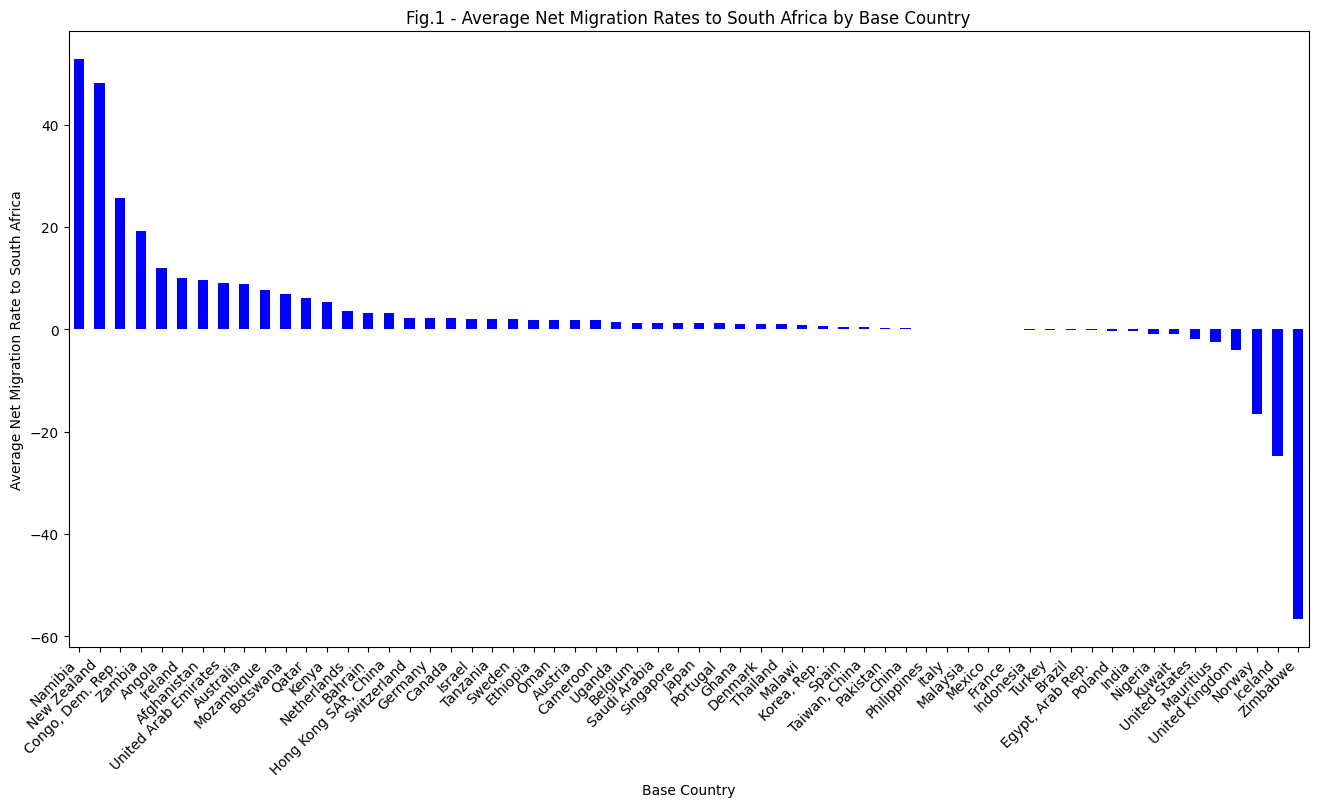




Fig.2 - Average Net Migration Rates from South Africa by Target Country:


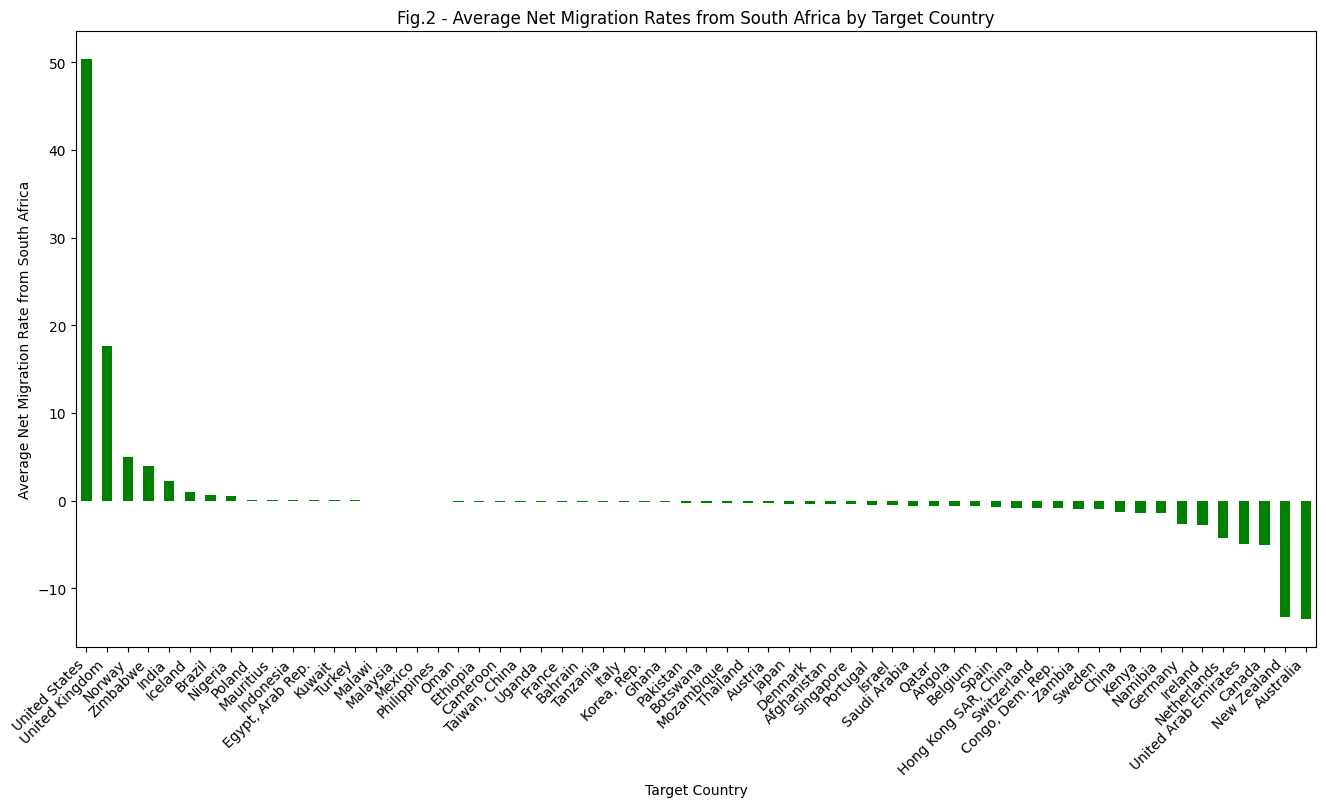




Fig.3 - Net Migration Rates to and from South Africa by Year:


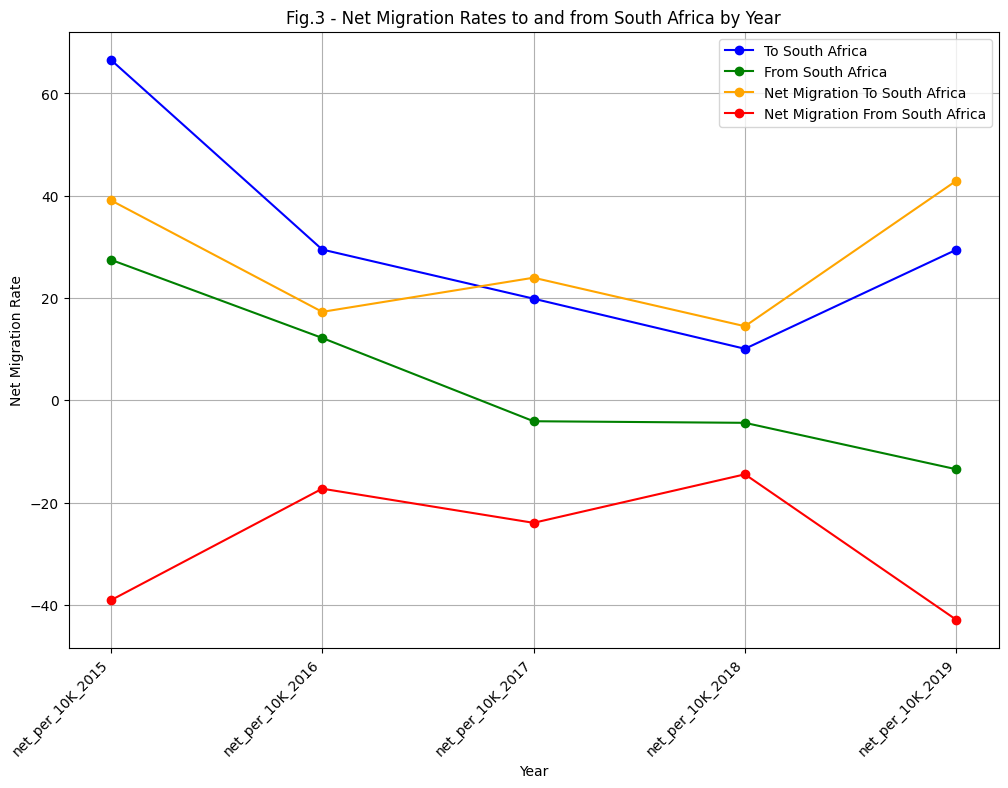




Fig.4 - Question 2 - Distribution of Migrants across Industries & Skill Demand: 


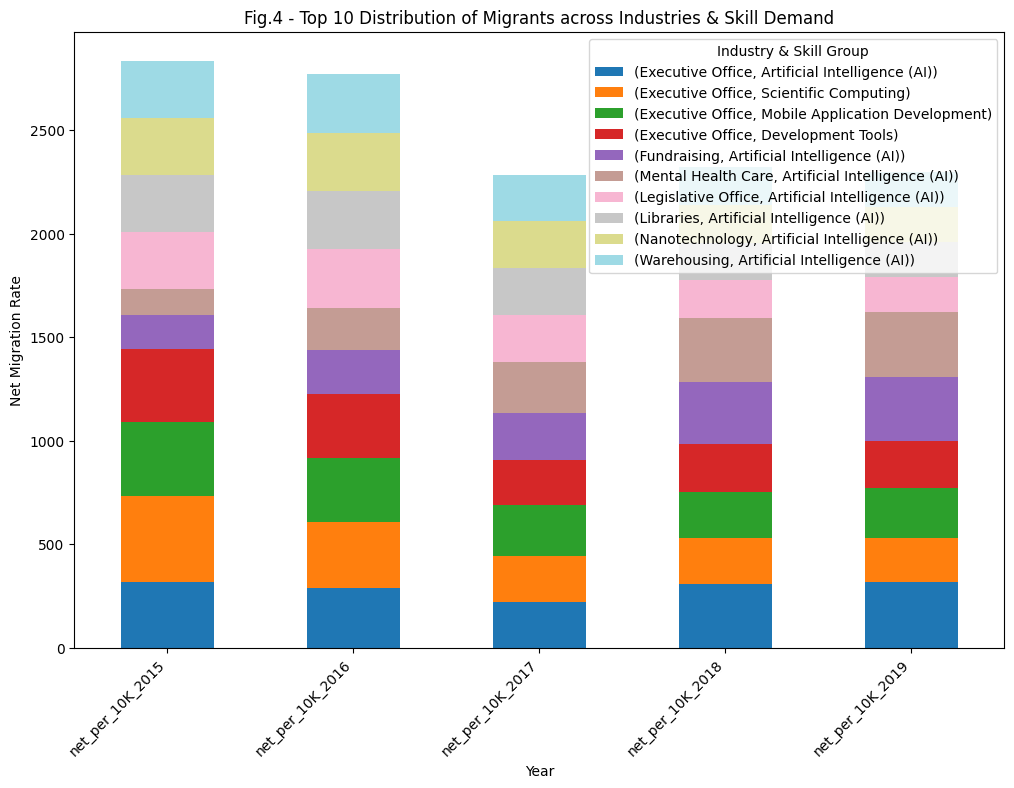




Fig.4 - Question 2 - Distribution of Migrants across Industries & Skill Demand: 


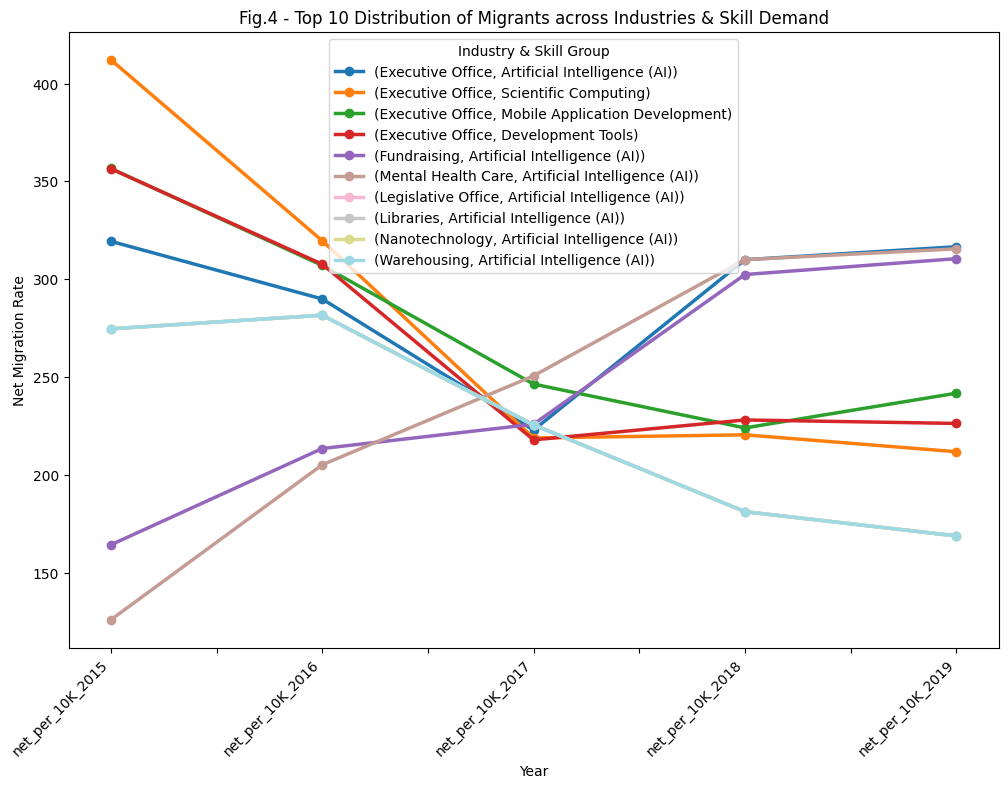

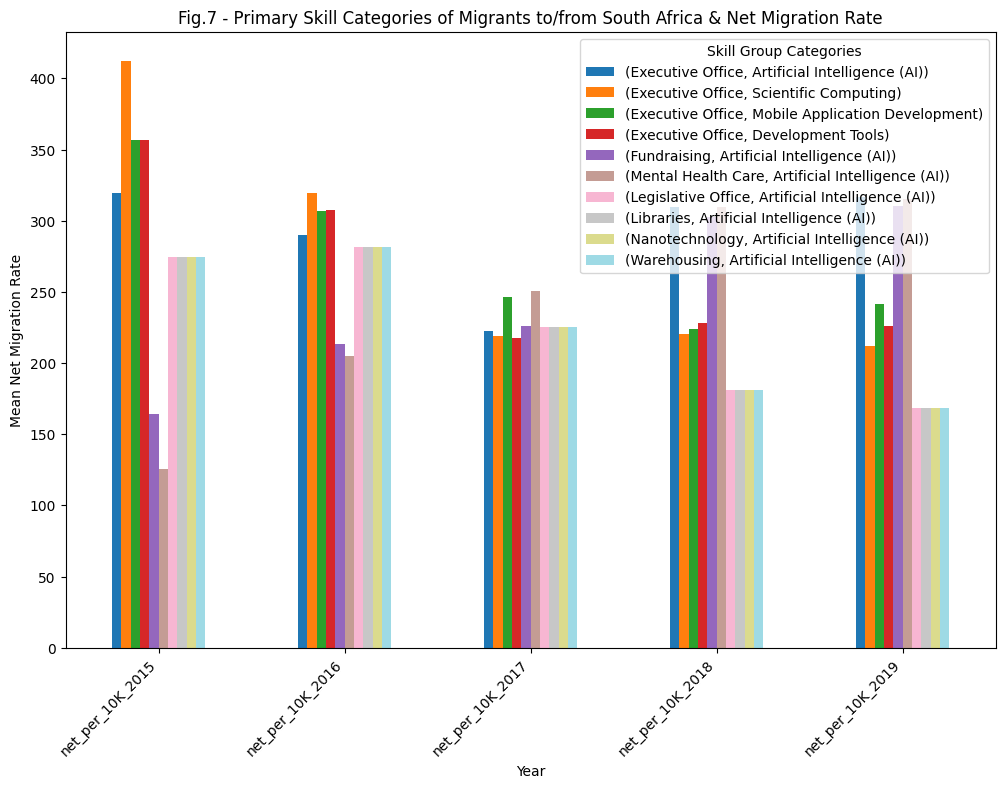

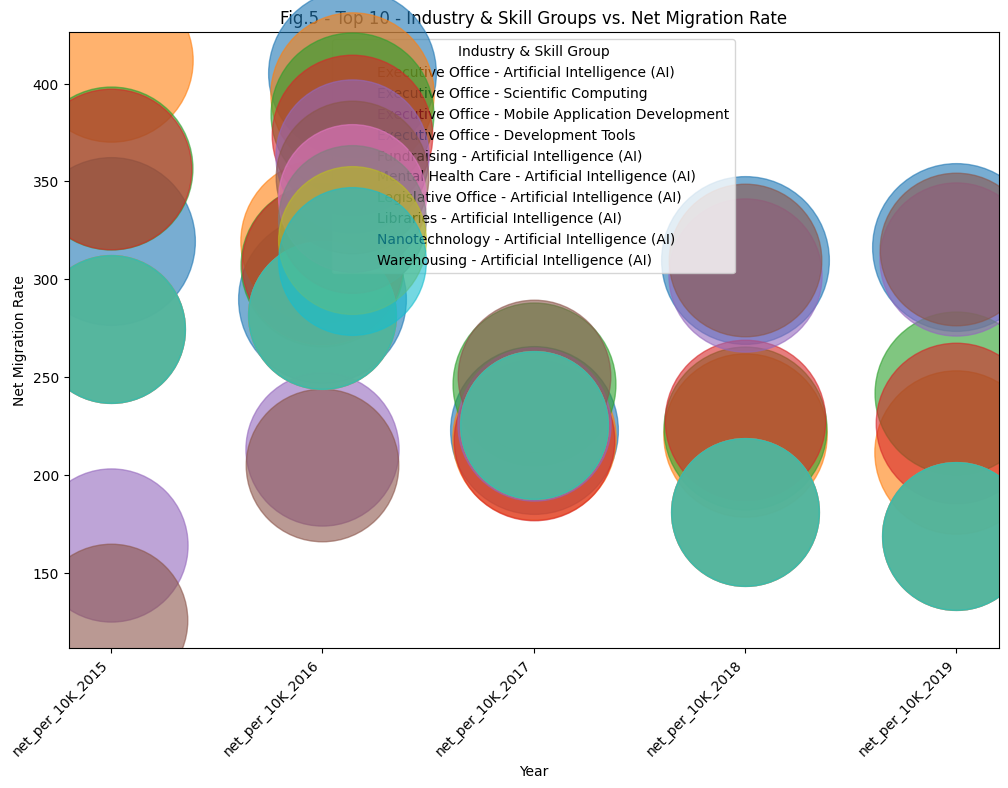

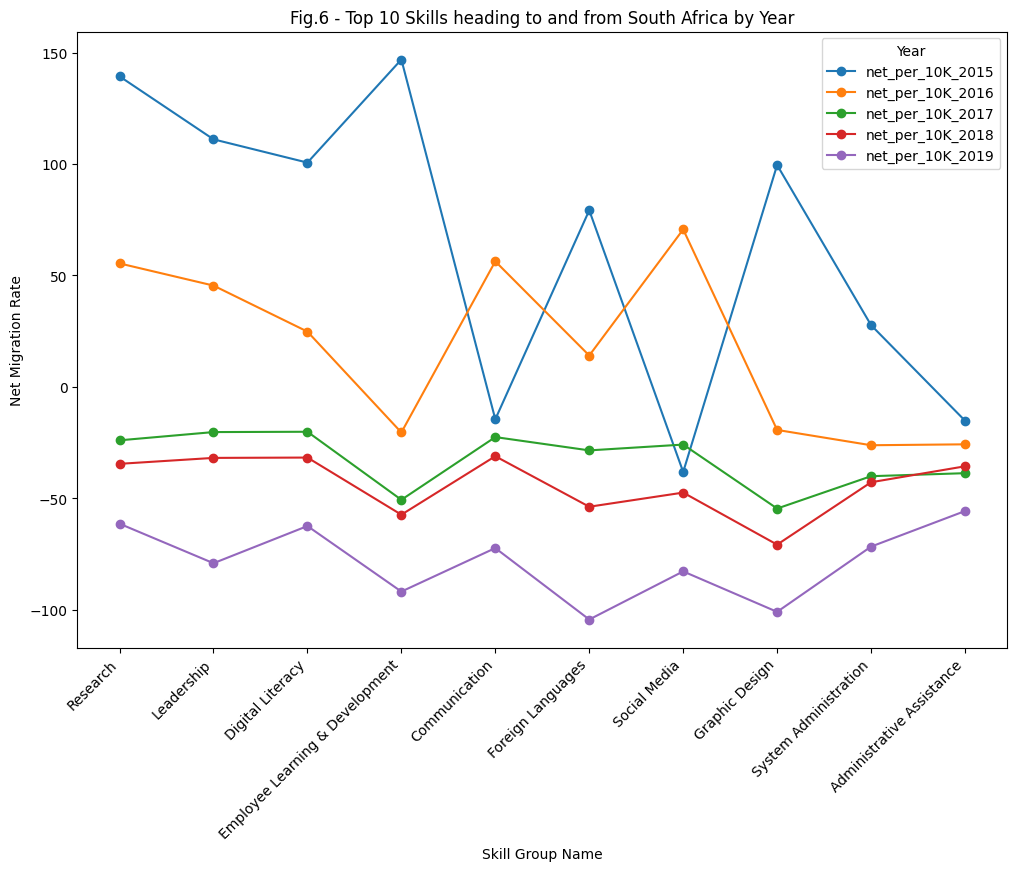



Question 3: What are the primary skill categories that migrants take from (or bring to) South Africa, and how have their net migration rates evolved annually?

Fig.7 - Primary Skill Categories of Migrants to/from South Africa & Net Migration Rate: 


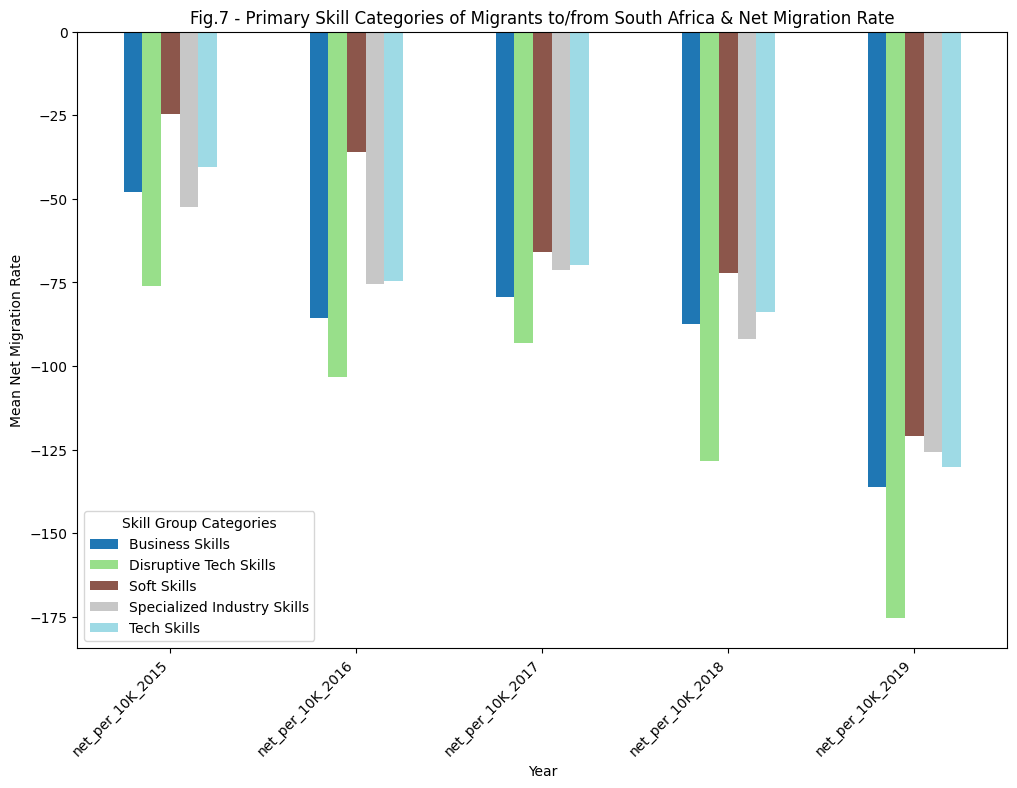



Question 4: How does South Africa's migration patterns compare with those of Neighbouring countries within the same World Bank region?

Fig.8 -Comparison of Net Migration Rates: South Africa vs Neighbouring Countries (Sub-Saharan Africa): 


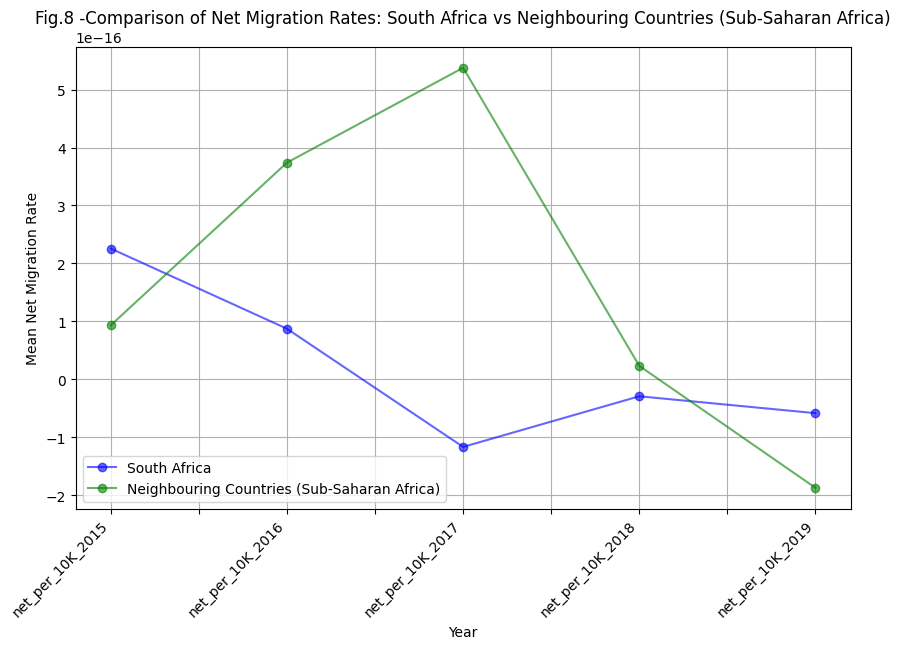




Fig.9 - Comparison of Net Migration Rates: By Income Groups: 




Fig.10 - Comparison of Net Migration Rates: By Income Groups: 


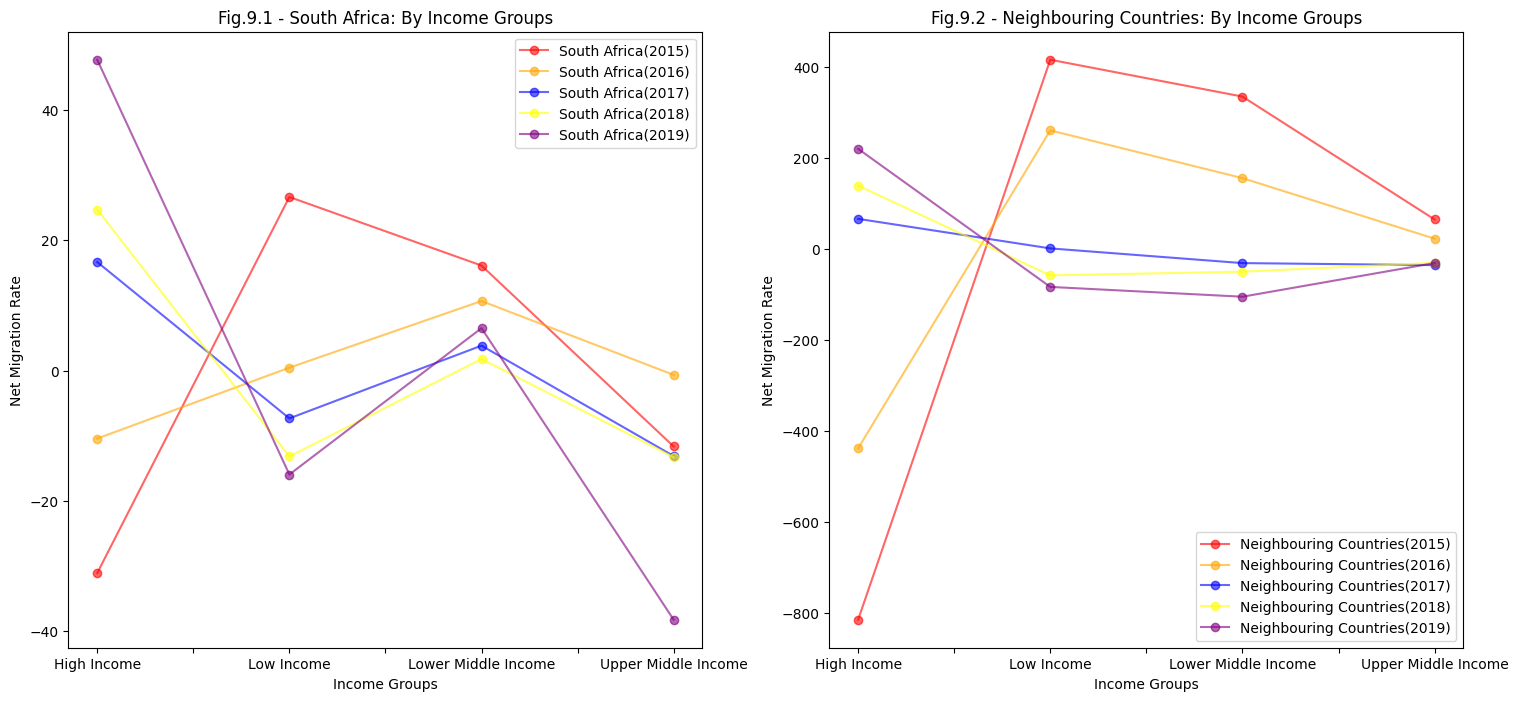

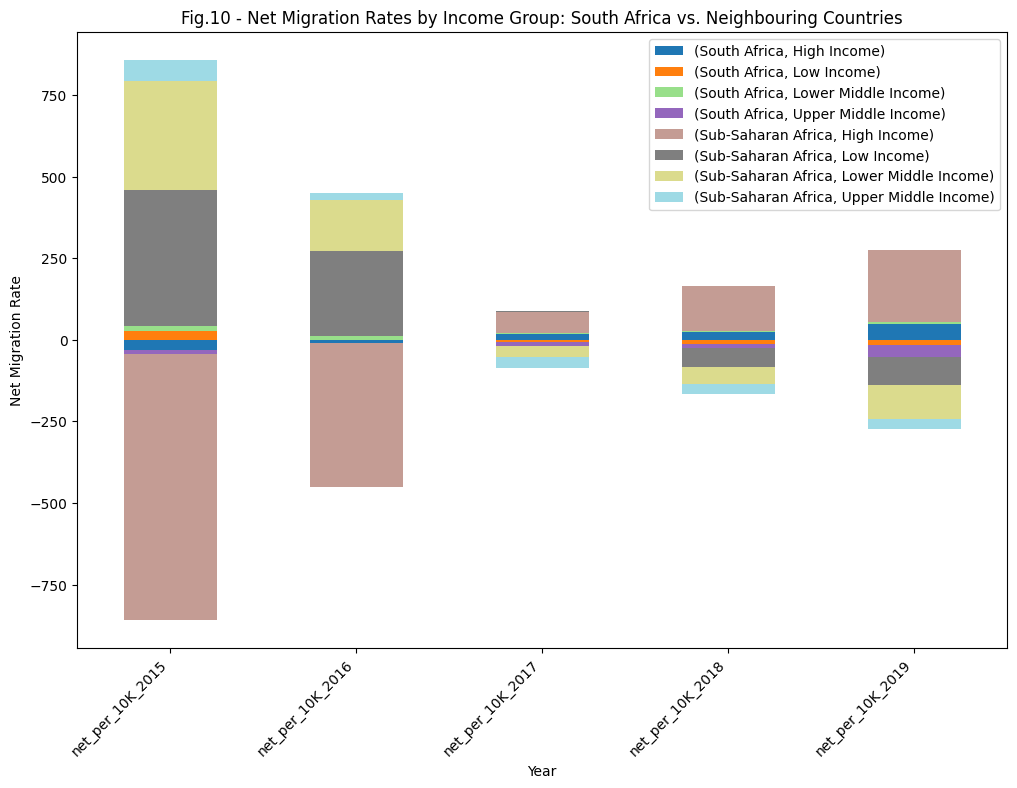


Comparison of Net Migration Rates: By Income Groups:                         South Africa                                                    Sub-Saharan Africa                                                   
base_country_wb_income  High Income Low Income Lower Middle Income Upper Middle Income        High Income Low Income Lower Middle Income Upper Middle Income
net_per_10K_2015             -31.07      26.62               16.10              -11.65            -815.05     415.71              334.72               64.62
net_per_10K_2016             -10.43       0.44               10.66               -0.67            -438.41     260.45              155.50               22.46
net_per_10K_2017              16.64      -7.34                3.82              -13.12              65.98       1.04              -31.26              -35.76
net_per_10K_2018              24.69     -13.18                1.77              -13.28             139.02     -58.20              -50.17              -30.65
net

In [24]:
# Visualise Data
def visualise_data(years, grouped_industry_skill_df_top10, top_skills_to):
  """
  Visualize the data using various plots to answer specific questions.
  The function generates and displays visualizations for the data analysis results, including bar plots, line plots, and bubble plots.
  """

  # Question 1: What are the main countries of origin/destination for migrants to/from South Africa, and how has the net migration rate changed over the years?
  # Step 1: Plot overall migration patterns
  # 1.1.1 Plotting migration to South Africa
  print("Question 1: What are the main countries of origin/destination for migrants to/from South Africa, and how has the net migration rate changed over the years?")
  print("\nFig.1 - Average Net Migration Rates to South Africa by Base Country:")
  plt.figure(figsize=(16, 8))
  migration_to_za_agg.sort_values(ascending=False).plot(kind='bar', color='blue')
  plt.xlabel("Base Country")
  plt.ylabel("Average Net Migration Rate to South Africa")
  plt.title("Fig.1 - Average Net Migration Rates to South Africa by Base Country")
  plt.xticks(rotation=45, ha="right", va="top")
  plt.show()
  print("\n")

  # 1.1.2 Plotting migration from South Africa
  print("\nFig.2 - Average Net Migration Rates from South Africa by Target Country:")
  plt.figure(figsize=(16, 8))
  migration_from_za_agg.sort_values(ascending=False).plot(kind='bar', color='green')
  plt.xlabel("Target Country")
  plt.ylabel("Average Net Migration Rate from South Africa")
  plt.title("Fig.2 - Average Net Migration Rates from South Africa by Target Country")
  plt.xticks(rotation=45, ha="right", va="top")
  plt.show()
  print("\n")

  # Step 2: Plot yearly migration patterns
  # 1.2.1 Plotting yearly migration to/from South Africa
  print("\nFig.3 - Net Migration Rates to and from South Africa by Year:")
  plt.figure(figsize=(12, 8))
  plt.plot(years, yearly_to_za, label='To South Africa', color='blue', marker='o')
  plt.plot(years, yearly_from_za, label='From South Africa', color='green', marker='o')
  plt.plot(years, yearly_net_migration_to_za, label='Net Migration To South Africa', color='orange', marker='o')
  plt.plot(years, yearly_net_migration_from_za, label='Net Migration From South Africa', color='red', marker='o')
  plt.xlabel("Year")
  plt.ylabel("Net Migration Rate")
  plt.title("Fig.3 - Net Migration Rates to and from South Africa by Year")
  plt.xticks(rotation=45, ha="right", va="top")
  plt.legend()
  plt.grid(True)
  plt.show()
  print("\n")

  # Question 2: Which industries are attracting migrants from South Africa, and what is the trend in their skill demand over recent years?
   # 2.1 Plot distribution of migrants across industries & skill demand
  print("\nFig.4 - Question 2 - Distribution of Migrants across Industries & Skill Demand: ")
  grouped_industry_skill_df_top10.set_index(['industry_name', 'skill_group_name'])[years].T.plot(kind="bar", stacked=True, figsize=(12, 8), cmap="tab20")
  plt.xlabel("Year")
  plt.ylabel("Net Migration Rate")
  plt.title("Fig.4 - Top 10 Distribution of Migrants across Industries & Skill Demand")
  plt.legend(title="Industry & Skill Group")
  plt.xticks(rotation=45, ha="right", va="top")
  plt.show()
  print("\n")

  print("\nFig.4 - Question 2 - Distribution of Migrants across Industries & Skill Demand: ")
  grouped_industry_skill_df_top10.set_index(['industry_name', 'skill_group_name'])[years].T.plot(kind="line", figsize=(12, 8), cmap="tab20", marker='o', linewidth=2.5)
  plt.xlabel("Year")
  plt.ylabel("Net Migration Rate")
  plt.title("Fig.4 - Top 10 Distribution of Migrants across Industries & Skill Demand")
  plt.legend(title="Industry & Skill Group")
  plt.xticks(rotation=45, ha="right", va="top")
  plt.show()
  print("\n")

  # 2.1 Plot distribution of migrants across industries & skill demand
  grouped_industry_skill_df_top10.set_index(['industry_name', 'skill_group_name'])[years].T.plot(kind="bar", figsize=(12, 8), cmap="tab20")
  plt.xlabel("Year")
  plt.ylabel("Mean Net Migration Rate")
  plt.title("Fig.7 - Primary Skill Categories of Migrants to/from South Africa & Net Migration Rate")
  plt.xticks(rotation=45, ha="right", va="top")
  plt.legend(title="Skill Group Categories")
  plt.show()
  print("\n")

  # 2.1 Plot distribution of migrants across industries & skill demand
  # print("\nQuestion 2 - Distribution of Migrants across Industries & Skill Demand: ")
  # plt.figure(dpi=80)
  # grouped_industry_skill_cat.T.plot(kind="bar", stacked=True, figsize=(12, 8), cmap="tab20")
  # plt.xlabel("Year")
  # plt.ylabel("Net Migration Rate")
  # plt.title("Distribution of Migrants across Industries & Skill Demand")
  # plt.legend(title="Industry & Skill Group")
  # plt.show()
  # print("\n")


  # print("\nQuestion 2 - Distribution of Migrants across Industries & Skill Demand (scatter): ")
  # fig, ax = plt.subplots(figsize=(12, 8))
  # for skill_group_category, data in grouped_industry_skill_cat.iterrows():
  #   ax.scatter(years, data, label=skill_group_category)
  # ax.set_xlabel("Year")
  # ax.set_ylabel("Net Migration Rate")
  # ax.set_title("Distribution of Migrants across Industries & Skill Demand")
  # ax.legend(title="Industry & Skill Group")
  # plt.show()
  # print("\n")

  # print("\nQuestion 2 - Distribution of Migrants across Industries & Skill Demand (bubble): ")
  plt.figure(figsize=(12, 8))
  for idx, row in grouped_industry_skill_df_top10.iterrows():
    industry_name = row["industry_name"]
    skill_group_name = row["skill_group_name"]
    data_points = row[years]
    bubble_size = row["bubble_size"]
    plt.scatter(years, data_points, s=bubble_size * 10, alpha=0.6, label=f"{industry_name} - {skill_group_name}")
  plt.xlabel("Year")
  plt.ylabel("Net Migration Rate")
  plt.title("Fig.5 - Top 10 - Industry & Skill Groups vs. Net Migration Rate")
  plt.xticks(rotation=45, ha="right", va="top")
  plt.legend(title="Industry & Skill Group")
  plt.show()
  print("\n")


  # print("\nQuestion 2 - Distribution of Migrants across Industries & Skill Demand (bubble): ")
  plt.figure(figsize=(12, 8))
  for year in years:
    plt.plot(top_skills_to.index, top_skills_to[year], label=year, marker="o")
  plt.xlabel("Skill Group Name")
  plt.xticks(rotation=45, ha="right", va="top")
  plt.ylabel("Net Migration Rate")
  plt.title("Fig.6 - Top 10 Skills heading to and from South Africa by Year")
  plt.xticks(rotation=45, ha="right", va="top")
  plt.legend(title="Year")
  plt.show()
  print("\n")

  #  Question 3: What are the primary skill categories that migrants take from (or bring to) South Africa, and how have their net migration rates evolved annually?Question 1: What are the main countries of origin/destination for migrants to/from South Africa, and how has the net migration rate changed over the years?
  print("Question 3: What are the primary skill categories that migrants take from (or bring to) South Africa, and how have their net migration rates evolved annually?")
  print("\nFig.7 - Primary Skill Categories of Migrants to/from South Africa & Net Migration Rate: ")
  grouped_skill_cat.T.plot(kind="bar", figsize=(12, 8), cmap="tab20")
  plt.xlabel("Year")
  plt.ylabel("Mean Net Migration Rate")
  plt.title("Fig.7 - Primary Skill Categories of Migrants to/from South Africa & Net Migration Rate")
  plt.xticks(rotation=45, ha="right", va="top")
  plt.legend(title="Skill Group Categories")
  plt.show()
  print("\n")

  # Question 4: How does South Africa's migration patterns compare with those of Neighbouring countries within the same World Bank region?
  # Visualize the net migration rates of South Africa and Neighbouring countries
  print("Question 4: How does South Africa's migration patterns compare with those of Neighbouring countries within the same World Bank region?")
  print("\nFig.8 -Comparison of Net Migration Rates: South Africa vs Neighbouring Countries (Sub-Saharan Africa): ")
  plt.figure(figsize=(10, 6))
  sa_net_migration_rates.mean().plot(kind="line", label="South Africa", color="blue", alpha=0.6, marker="o")
  region_net_migration_rates.mean().plot(kind="line", label="Neighbouring Countries (Sub-Saharan Africa)", color="green", alpha=0.6, marker="o")
  plt.xlabel("Year")
  plt.ylabel("Mean Net Migration Rate")
  plt.title("Fig.8 -Comparison of Net Migration Rates: South Africa vs Neighbouring Countries (Sub-Saharan Africa)")
  plt.xticks(rotation=45, ha="right", va="top")
  plt.legend()
  plt.grid(True)
  plt.show()
  print("\n")

  # Visualize the comparison of net migration rates of South Africa and Neighbouring countries (by income group)
  print("\nFig.9 - Comparison of Net Migration Rates: By Income Groups: ")
  # Define the line colours
  colours = ["red", "orange", "blue", "yellow", "purple"]

  fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18, 8))

  for i, year in enumerate(years):
    sa_migration_income_group[year].plot(ax=ax1, kind="line", label=f"South Africa({year[-4:]})", color=colours[i], marker="o", alpha=0.6)

  ax1.set_xlabel("Income Groups")
  ax1.set_ylabel("Net Migration Rate")
  ax1.set_title("Fig.9.1 - South Africa: By Income Groups")
  ax1.legend(loc="upper right")

  for i, year in enumerate(years):
    region_migration_income_group[year].plot(ax=ax2, kind="line", label=f"Neighbouring Countries({year[-4:]})", color=colours[i], marker="o", alpha=0.6)

  ax2.set_xlabel("Income Groups")
  ax2.set_ylabel("Net Migration Rate")
  ax2.set_title("Fig.9.2 - Neighbouring Countries: By Income Groups")
  ax2.legend(loc="lower right")
  print("\n")

  print("\n\nFig.10 - Comparison of Net Migration Rates: By Income Groups: ")
  combined_sa_region_income_data.plot(kind="bar", stacked=True, figsize=(12, 8), cmap="tab20")
  plt.xlabel("Year")
  plt.ylabel("Net Migration Rate")
  plt.title("Fig.10 - Net Migration Rates by Income Group: South Africa vs. Neighbouring Countries")
  plt.legend(loc="upper right")
  plt.xticks(rotation=45, ha="right", va="top")
  plt.show()
  print("\nComparison of Net Migration Rates: By Income Groups: ", combined_sa_region_income_data)
  print("\n")

visualise_data(years, grouped_industry_skill_df_top10, top_skills_to)


# Summary
_what has this dataset told you_
_include what you have learnt from this project_